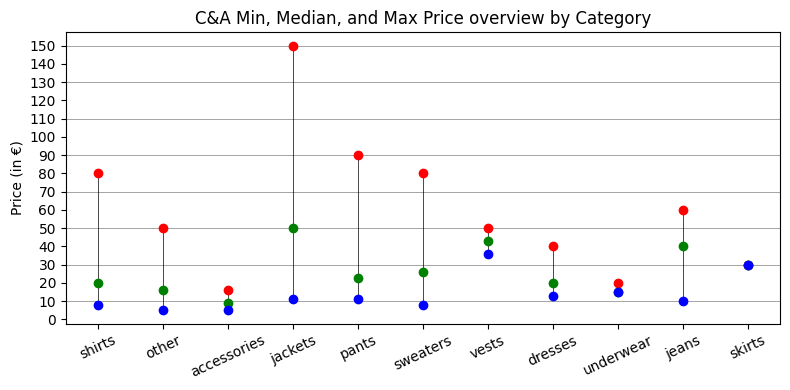

In [1]:
import matplotlib.pyplot as plt
from numpy import median
import pandas

STD_PATH = "/workspaces/365-Days-365-projects/February/CANDA_webscraper/listings/all_products.csv"

def getProducts(file_path: str = STD_PATH):
    cleaned_data: dict[str, list[tuple[str, int]]] = {}
    try:
        ds = pandas.read_csv(file_path)
        for _, row in ds.iterrows():
            product_name = str(row.get("title", ""))
            category = str(row.get("category", ""))
            try:
                price = float(row.get("price", "").replace(",", "."))
            except ValueError:
                continue
            if category not in cleaned_data:
                cleaned_data[category] = []
            cleaned_data[category].append((product_name, price))
    except Exception as e:
        print(f"! Error: {e}")
    return cleaned_data

def plotProducts():
    products = getProducts()
    categories = list(products.keys())
    min_prices = []
    median_prices = []
    max_prices = []
    
    for category in categories:
        prices = [product[1] for product in products[category]]
        if prices:
            min_prices.append(min(prices))
            median_prices.append(median(prices))
            max_prices.append(max(prices))
        else:
            min_prices.append(0)
            median_prices.append(0)
            max_prices.append(0)
    
    plt.figure(figsize=(8, 4))
    ax = plt.gca()
    for y in range(10, int(max(max_prices)) + 10, 20):
        ax.axhline(y, color='grey',linewidth=0.5)
    for i, category in enumerate(categories):
        plt.vlines(i, min_prices[i], max_prices[i], color='black', linewidth=0.5)
    x_positions = range(len(categories))
    plt.plot(x_positions, max_prices, 'ro', label='Max Price')
    plt.plot(x_positions, median_prices, 'go', label='Median Price')
    plt.plot(x_positions, min_prices, 'bo', label='Min Price')

    plt.xticks(x_positions, categories, rotation=25)
    plt.yticks(range(0, int(max(max_prices)) + 10, 10))
    plt.ylabel('Price (in €)')
    plt.title('C&A Min, Median, and Max Price overview by Category')
    plt.tight_layout()
    plt.show()

plotProducts()